# Indonesia Monthly Minimum Salary Analysis with Python

The dataset that I am using to analyze monthly minimum salary (by Region) was from Kaggle source = https://www.kaggle.com/datasets/linkgish/indonesian-salary-by-region-19972022. Indonesian monthly salary by regional/province, start from 1997 to 2022. This is minimum salary (UMR) based on government policy. Mostly Indonesian government updated this minimum monthly salary in every year.

There are three columns in this dataset.

1. Region = Province selected
2. Salary = Number of salary in IDR
3. Year = Years when the salary applied

We want to have insight about :
1. Biggest salary region in 2022
2. Lowest salary region in 2022
3. Biggest salary region growth in the last decade
4. Lowest salary region growth in the last decade

# Loading the Dataset

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
url = 'https://raw.githubusercontent.com/mjfithor/Minimum-Wage-Analysis/main/Indonesian%20Salary%20by%20Region%20(1997-2022).csv'
data = pd.read_csv(url)
data.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


# Data Cleaning

## Before we go ahead, let’s see whether or not this dataset contains missing values

In [78]:
data.isnull().sum()

REGION    0
SALARY    0
YEAR      0
dtype: int64

## Checking duplicated rows

In [79]:
data.duplicated().sum()

0

## Checking unique value of 'REGION'

In [80]:
data['REGION'].nunique()

35

Indonesia have 37 provinces so we miss data in some provinces

## Checking if we have complete data, checking by the Region

In [81]:
data['REGION'].value_counts()

ACEH                    26
NUSA TENGGARA BARAT     26
INDONESIA               26
PAPUA                   26
MALUKU                  26
SULAWESI TENGGARA       26
SULAWESI SELATAN        26
SULAWESI TENGAH         26
SULAWESI UTARA          26
KALIMANTAN TIMUR        26
KALIMANTAN SELATAN      26
KALIMANTAN TENGAH       26
SUMATERA UTARA          26
NUSA TENGGARA TIMUR     26
KALIMANTAN BARAT        26
BALI                    26
LAMPUNG                 26
SUMATERA BARAT          26
RIAU                    26
JAWA TIMUR              26
SUMATERA SELATAN        26
BENGKULU                26
JAMBI                   26
KEP. RIAU               26
DKI JAKARTA             26
JAWA BARAT              26
JAWA TENGAH             26
DI YOGYAKARTA           26
KEP. BANGKA BELITUNG    25
BANTEN                  25
GORONTALO               25
MALUKU UTARA            25
SULAWESI BARAT          17
PAPUA BARAT             17
KALIMANTAN UTARA         8
Name: REGION, dtype: int64

- 'INDONESIA' is not a province so we need to drop rows with that value
- Minus 'INDONESIA', we have data form 34 provinces, so we don't have data from 3 province which is Papua Tengah, Papua Pegunungan, and Papua Selatan
- We miss some data from: 

1. KEP. BANGKA BELITUNG   
2. BANTEN                  
3. GORONTALO               
4. MALUKU UTARA           
5. SULAWESI BARAT        
6. PAPUA BARAT            
7. KALIMANTAN UTARA         

In [82]:
# Drop rows with 'INDONESIA'
data = data[~data['REGION'].str.contains('INDONESIA')]

In [83]:
data['REGION'].value_counts()

ACEH                    26
BALI                    26
PAPUA                   26
MALUKU                  26
SULAWESI TENGGARA       26
SULAWESI SELATAN        26
SULAWESI TENGAH         26
SULAWESI UTARA          26
KALIMANTAN TIMUR        26
KALIMANTAN SELATAN      26
KALIMANTAN TENGAH       26
SUMATERA UTARA          26
NUSA TENGGARA TIMUR     26
NUSA TENGGARA BARAT     26
KALIMANTAN BARAT        26
JAWA TIMUR              26
BENGKULU                26
SUMATERA BARAT          26
RIAU                    26
DI YOGYAKARTA           26
SUMATERA SELATAN        26
JAMBI                   26
LAMPUNG                 26
KEP. RIAU               26
DKI JAKARTA             26
JAWA BARAT              26
JAWA TENGAH             26
KEP. BANGKA BELITUNG    25
BANTEN                  25
GORONTALO               25
MALUKU UTARA            25
SULAWESI BARAT          17
PAPUA BARAT             17
KALIMANTAN UTARA         8
Name: REGION, dtype: int64

# Peform Analysis

## Finding the biggest and lowest monthly minimum salary in 2022

In [84]:
year_2022 = data[data['YEAR'] == 2022]
year_2022.head()

,REGION,SALARY,YEAR
835,ACEH,3166460,2022
836,SUMATERA UTARA,2522609,2022
837,SUMATERA BARAT,2512539,2022
838,RIAU,2938564,2022
839,JAMBI,2649034,2022


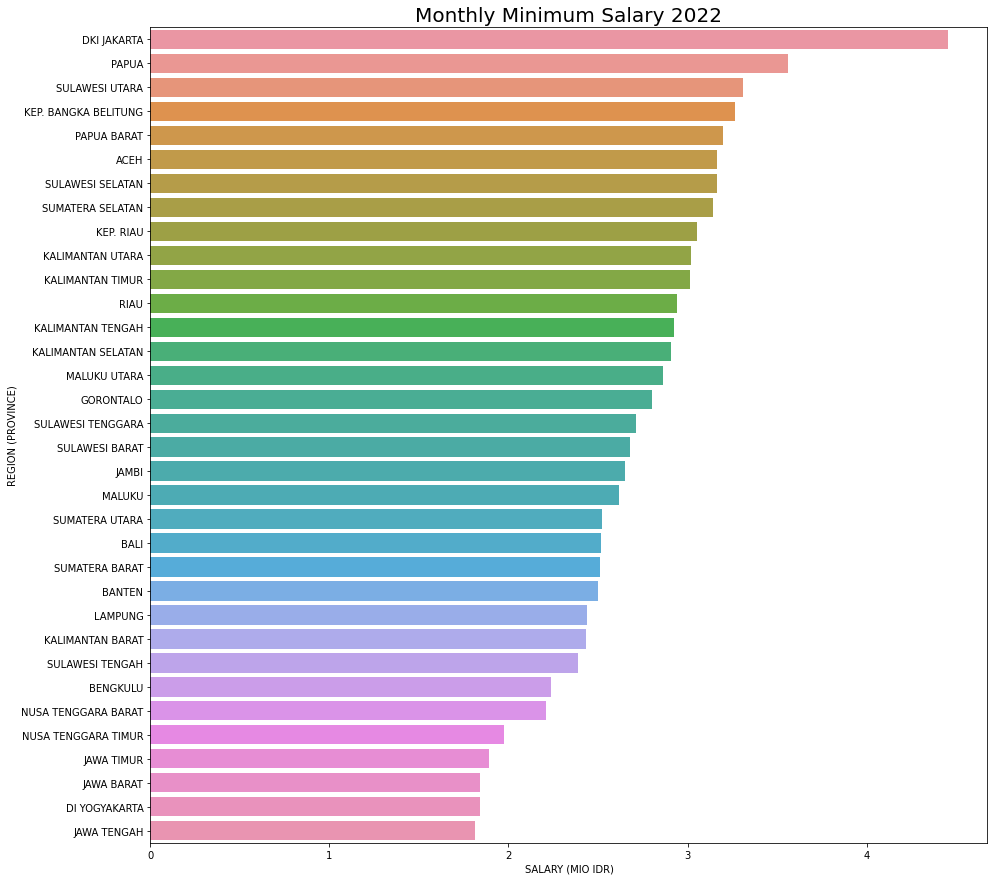

In [85]:
year_2022 = year_2022.sort_values(['SALARY'],ascending=False)

plt.figure(figsize=(15, 15))
plt.title("Monthly Minimum Salary 2022", fontsize=20)
sns.barplot(x=year_2022['SALARY'] / 10**6,
            y=year_2022['REGION'])
plt.xlabel('SALARY (MIO IDR)')
plt.ylabel('REGION (PROVINCE)')

plt.show()

In [86]:
year_2022.describe()

,SALARY,YEAR
count,3.400000e+01,34.0
mean,2.722436e+06,2022.0
std,5.548530e+05,0.0
min,1.813011e+06,2022.0
25%,2.435868e+06,2022.0
50%,2.694729e+06,2022.0
75%,3.041814e+06,2022.0
max,4.452724e+06,2022.0


- DKI Jakarta has the biggest minimum monthly salary in 2022 with IDR 4.452.724
- Jawa Tengah has the lowest minimum monthly salary in 2022 with IDR 1.813.011

## Finding insight about the growth of both region

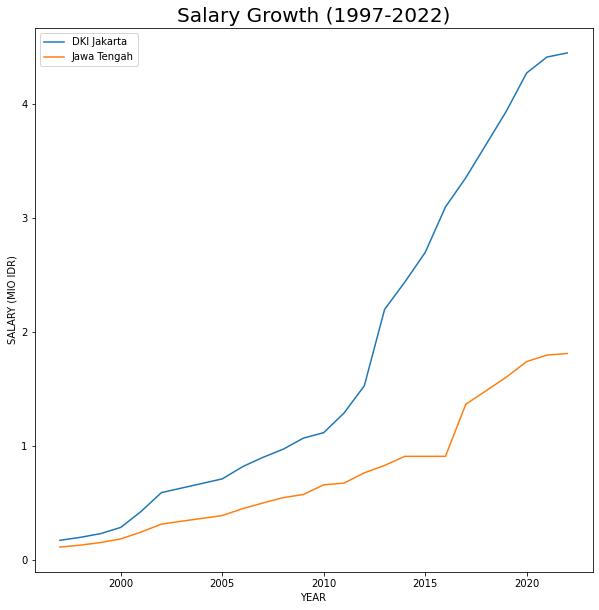

In [87]:
# We want to analyze salary growth
jakarta = data[data['REGION'] == 'DKI JAKARTA']
jawa_tengah = data[data['REGION'] == 'JAWA TENGAH']

plt.figure(figsize=(10, 10))
plt.plot(jakarta['YEAR'], jakarta['SALARY'] / 10**6)
plt.plot(jawa_tengah['YEAR'], jawa_tengah['SALARY'] / 10**6)
plt.xlabel('YEAR')
plt.ylabel('SALARY (MIO IDR)')
plt.legend(['DKI Jakarta', 'Jawa Tengah'])
plt.title("Salary Growth (1997-2022)", fontsize=20)
plt.show()

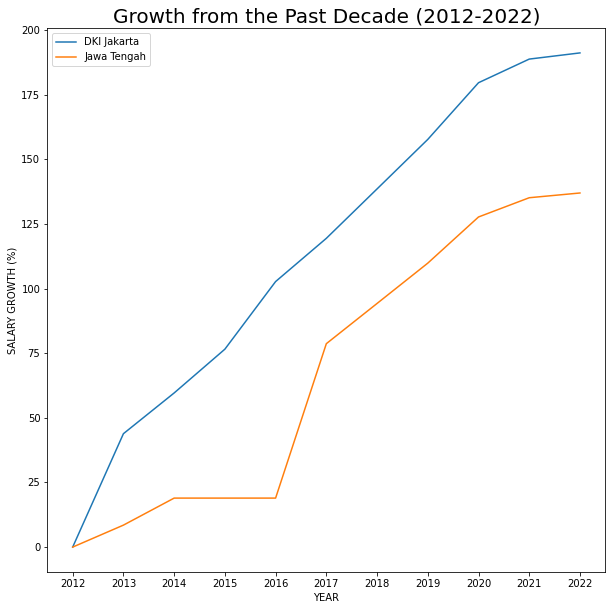

In [88]:
# We want to analyze the precentage growth in the last decade (2012 - 2022)
percentage_jkt = jakarta.SALARY[-11::1] / jakarta.SALARY.iloc[-11] * 100 - 100
percentage_jt = jawa_tengah.SALARY[-11::1] / jawa_tengah.SALARY.iloc[-11] * 100 - 100

plt.figure(figsize=(10, 10))
plt.plot(jakarta.YEAR[-11::1], percentage_jkt)
plt.plot(jawa_tengah.YEAR[-11::1], percentage_jt)
plt.xlabel('YEAR')
plt.ylabel('SALARY GROWTH (%)')
plt.legend(['DKI Jakarta', 'Jawa Tengah'])
plt.title("Growth from the Past Decade (2012-2022)", fontsize=20)
plt.xticks(jawa_tengah.YEAR[-11::1])
plt.show()